<a href="https://colab.research.google.com/github/Yen-Nhi-23/TTNT/blob/main/Tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

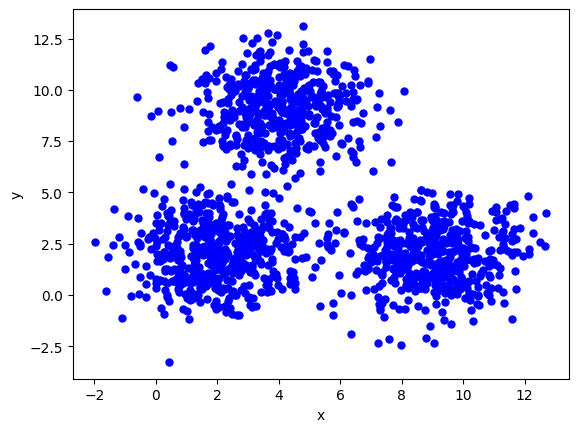

[[ 2.01140139  2.18225898]
 [ 8.20485477 -0.2253962 ]
 [ 3.46604658  2.41450997]]


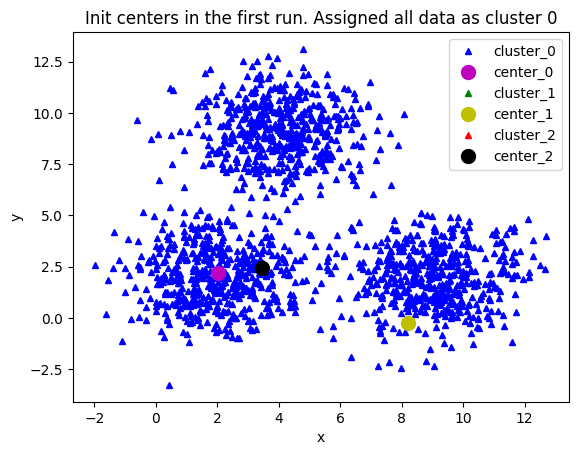

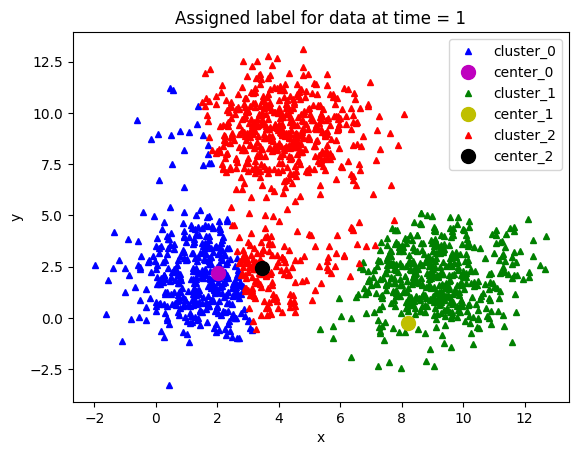

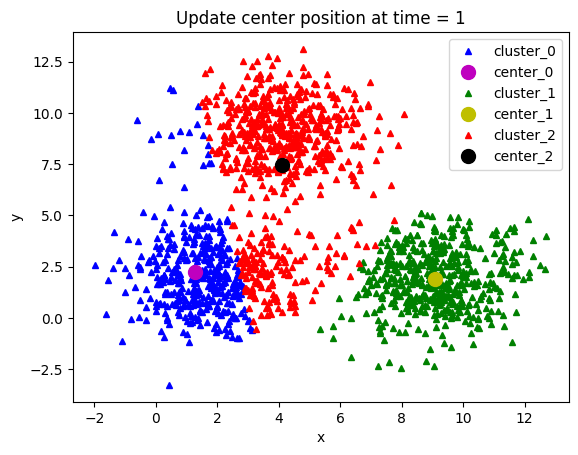

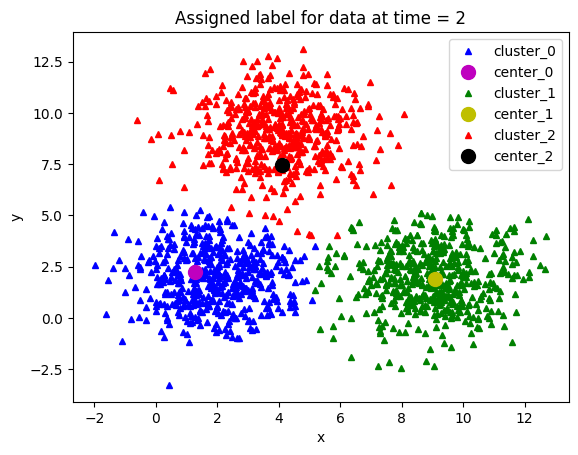

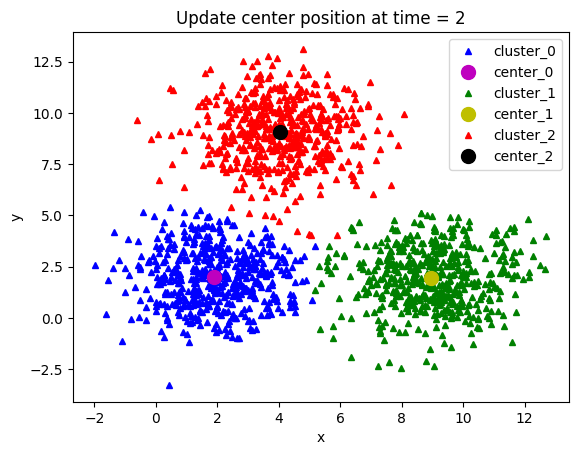

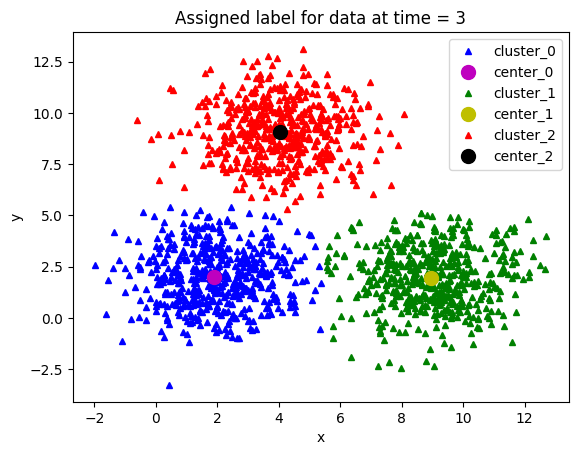

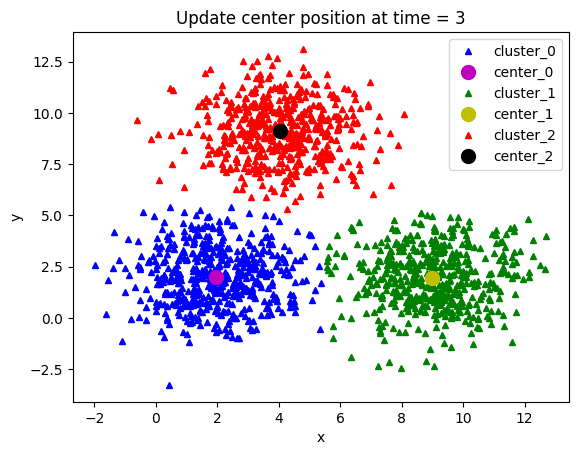

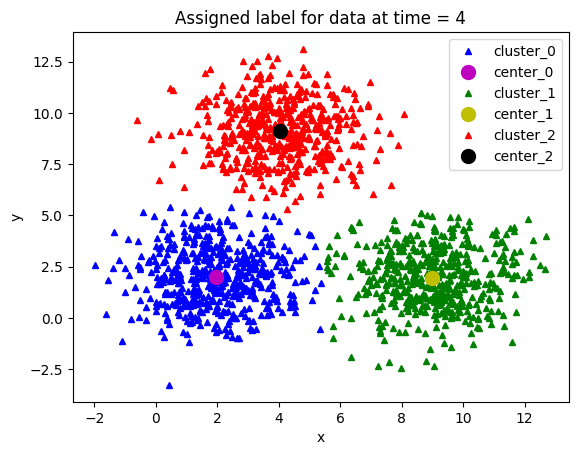

Done! Kmeans has converged after 3 times
[[1.9502665  2.01708551]
 [8.98632013 1.97043532]
 [4.02532435 9.12192462]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.show()

def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    Xk = X[labels == k, :]
    centers[k, :] = np.mean(Xk, axis=0)
  return centers

def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
  for i in range(n_cluster):
    data = X[labels == i]
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4, label='cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o', markersize=10, label='center_' + str(i))
  plt.legend()
  plt.show()

def kmeans(init_centers, init_labels, X, n_cluster):
  centers = init_centers
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center position at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers)
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')
print(centers)































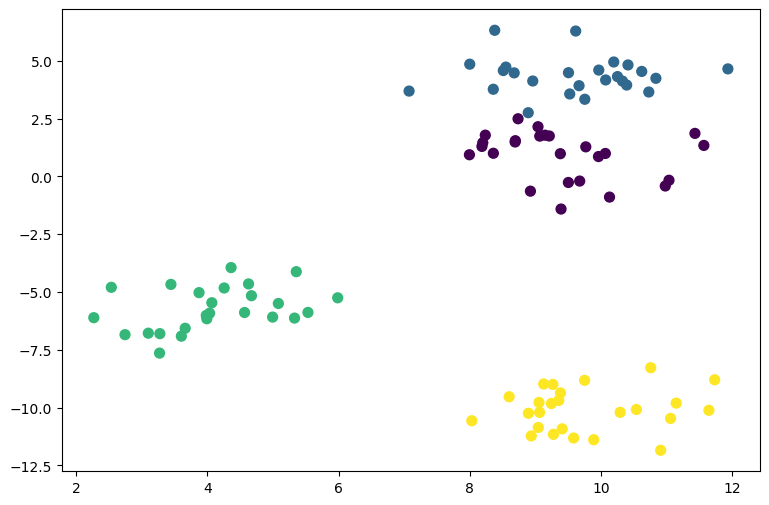

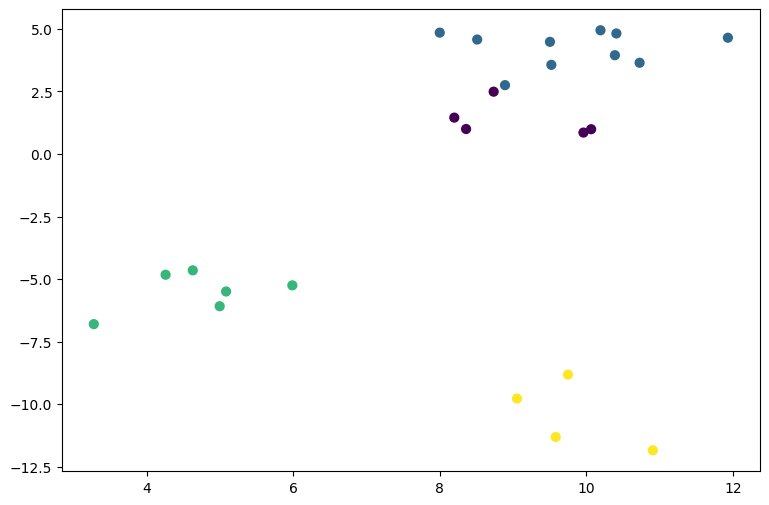

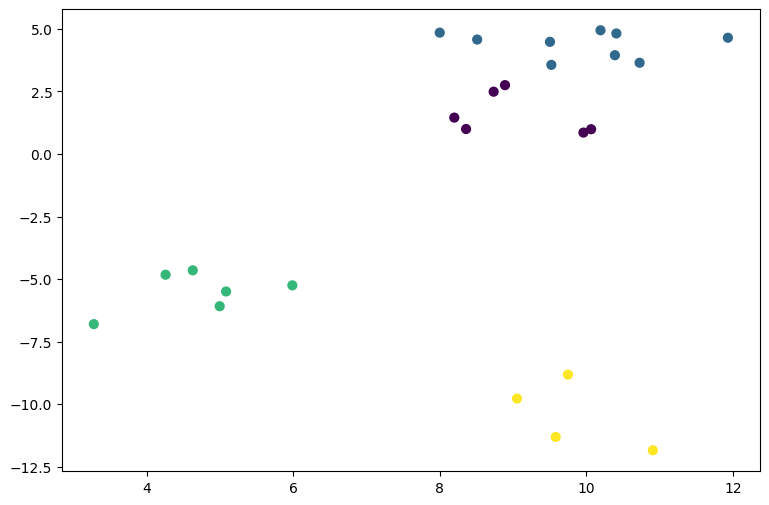

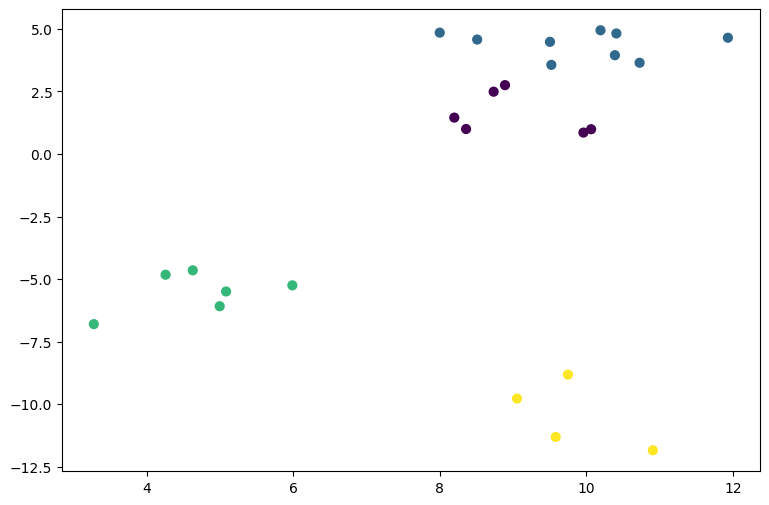

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x, y = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 1, random_state = 4)
plt.figure(figsize=(9, 6))
plt.scatter(x[:, 0], x[:, 1], c = y, marker='o', s = 50)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
plt.figure(figsize=(9, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='o', s=40)
plt.show()


knn5 = KNeighborsClassifier(5)
knn5.fit(x_train, y_train)

y_pred_5 = knn5.predict(x_test)
plt.figure(figsize=(9, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred_5, marker='o', s=40)
plt.show()


knn1 = KNeighborsClassifier(1)
knn1.fit(x_train, y_train)
y_pred_1 = knn1.predict(x_test)
plt.figure(figsize = (9,6))
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_1, marker='o' , s=40)
plt.show()



def KNN(X_train, X_test, y_train, k):
  num_test = X_test.shape[0]
  num_train = X_train.shape[0]
  y_pred = np.zeros((num_test, num_train))
  for i in range(num_test):
    for j in range(num_train):
      y_pred[i, j] = np.sqrt(np.sum((X_test[i, :] - X_train[j, :])**2))
      result = []
      for i in range(len(y_pred)):
        result.append(np.argsort(y_pred[i]  ))
      result = np.array(result)
      result = result[:, :k]
      y_pred = []
      for i in range(len(result)):
        y_pred.append(np.argmax(np.bincount(y_train[result[i]])))
      y_pred = np.array(y_pred)
      return y_pred
  (X, y) = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=4)
  cluster_std = 1, random_state = 4
  X_test=np.array([[1, 3]])
  results = KNN(X, X_test, y, 3)
  print(results)








